In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn import preprocessing
#%pylab inline

In [25]:
ID='1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc'
sheet_url="https://docs.google.com/spreadsheets/d/1JweHYY03X9p8mU4TkMJhI6MUiqZziKMJaTqexgLawNc/edit#gid=1744952440"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
raw=pd.read_csv(url_1)
raw.rename(columns={'Depth of the sole layer, m':'Depth, m','Power of the sole layer, m':'Thickness, m', 'Code':'Code of soil', 'Description':'Soil description'}, inplace=True)
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   km                593 non-null    int64  
 1   Picket            593 non-null    int64  
 2   Rider, m          593 non-null    float64
 3   Depth, m          593 non-null    float64
 4   Power, m          593 non-null    float64
 5   Code of soil      593 non-null    int64  
 6   Soil description  591 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 32.6+ KB
None


In [26]:
df=raw.copy()
df['Distance, m']=df['Picket']+df['Rider, m']*0.01
raw.describe()

,km,Picket,"Rider, m","Depth, m","Power, m",Code of soil
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,346.504216,3469.895447,52.656627,6.377909,2.259865,375.873524
std,4.461214,44.746461,25.219520,4.861157,1.964020,249.829913
min,340.000000,3403.000000,0.000000,0.000000,0.000000,0.000000
25%,343.000000,3434.000000,40.000000,1.900000,0.900000,205.000000
50%,346.000000,3466.000000,56.000000,5.000000,1.700000,307.000000
75%,349.000000,3497.000000,66.000000,11.200000,2.900000,448.000000
max,358.000000,3589.000000,96.000000,17.000000,10.500000,931.000000


In [27]:
df['Soil type'] = pd.cut(df['Code of soil'],bins=[0,60,80, 100, 200, 300, 400, 900, 1000], labels=['Почва','Мох','Вода','Глина','Суглинок','Супесь','Песок','Торф'])

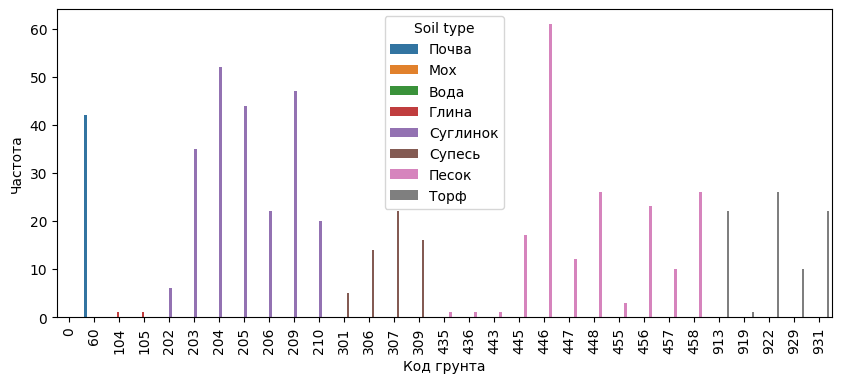

In [33]:
plt.figure(figsize=(10, 4))
g=sns.countplot(data=df, x='Code of soil', hue='Soil type' )
plt.xlabel('Код грунта')
plt.ylabel('Частота')
# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.show()

Text(11.872736111111111, 0.5, 'Глубина, м')

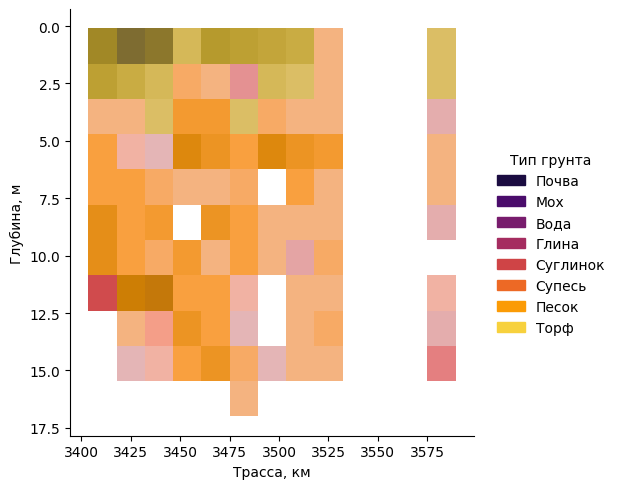

In [29]:
g=sns.displot(df, x="Distance, m", y="Depth, m", hue='Soil type', palette='inferno') #, kind="kde")
g._legend.set_title('Тип грунта')
plt.gca().invert_yaxis()
plt.xlabel('Трасса, км')
plt.ylabel('Глубина, м')

In [30]:
keyword_values = {
    'водой': 80,
    'вода': 80,
    'Вода' : 80,
    'водо': 85,
    'твердомерзлый':90,
    'твердомерзлая': 90,
    'пластичномерзлый': 93,
    'пластичномерзлая': 93,
    'льдистый': 95,
    'льдистая': 95,
    'лед': 97,
    'крио': 98
}

# Update the 'Water' column based on the specific keywords
def assign_water_value(description):
    for keyword, value in keyword_values.items():
        if keyword in description:
            return value
    return 0  # Assign 0 if no keyword is found

df['Water_cat'] = df['Soil description'].apply(lambda x: assign_water_value(x) if isinstance(x, str) else 0)

Text(8.273827160493825, 0.5, 'Глубина, м')

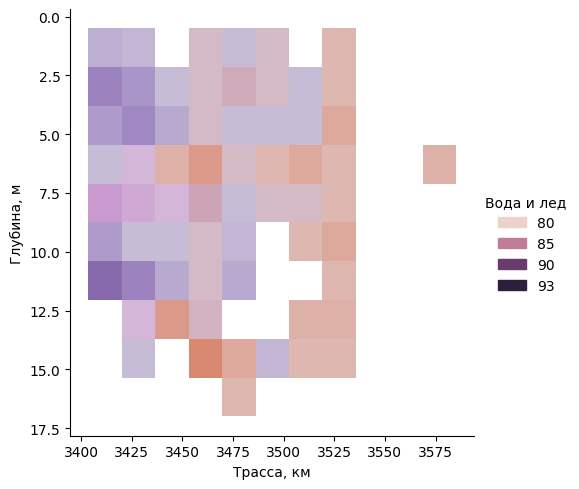

In [31]:
sns.color_palette("mako", as_cmap=True)
# Filter the data where Water_cat is not equal to 0
filtered_data = df[df['Water_cat'] != 0]
g = sns.displot(data=filtered_data, x="Distance, m", y="Depth, m", hue='Water_cat') #, palette="Blue")
g._legend.set_title('Вода и лед')
plt.gca().invert_yaxis()
plt.xlabel('Трасса, км')
plt.ylabel('Глубина, м')